---
## Matemáticas para la Ciencia de Datos
#### Profesor: Dra. Briceyda B. Delgado López
#### Alumno: Miroslava Sandria Yong
#### Actividad: Tarea 5. Modelación Experimental.
---

> 1. Cuando se utilizan programas para construir simulaciones, a menudo se necesita una estimación del tiempo de CPU necesario para ejecutar la simulación, ya que algunos parámetros han cambiado. A veces, esto puede ser un problema muy difícil de resolver, porque no está claro cómo el esfuerzo de la CPU depende de los parámetros. En este ejercicio, consideraremos un programa muy simple para ilustrar cómo se pueden generar estimaciones de tiempo.
>
> Supongamos que queremos una solución numérica del problema 
>
> $$ y'(t) = e^{y(t)}, \quad y(0) = 0, \quad 0 \leq t \leq 1.  \qquad \qquad (1) $$
>
>
> Si intentamos resolver (1) usando el esquema estándar de Euler, tenemos que
>
> $$ y_{k+1} = y_k + \Delta t \cdot e^{y_k}, \quad k = 0, 1, \ldots, n - 1. $$ 
>
> con $ y_0 = 0 $. Aquí, $ \Delta t = \frac{1}{n} $, 
> donde $ n > 0 $ es un número entero. 
>
> En la Tabla siguiente hemos enumerado el tiempo de CPU que necesita un sencillo programa en C para calcular $ y_n $ en el tiempo $ t = 1 $ en un procesador Pentium III de 600 MHz.
>
>
>
| $n$        | CPU time | $y_n$   |
|------------|----------|---------|
| 100,000    | 0.05     | 9.9181  |
| 200,000    | 0.09     | 10.549  |
| 300,000    | 0.13     | 10.919  |
| 400,000    | 0.18     | 11.183  |
>
>
>A partir del esquema, es razonable suponer que el tiempo de CPU, $c(n)$, puede modelarse adecuadamente utilizando una función lineal, es decir:
>
>$$ c(n) = \alpha + \beta n $$
>
>*(a)* Utilice los datos de la tabla para determinar $\alpha$ y $\beta$ por el método de mínimos cuadrados.
>
> *(b)* Estime el tiempo de CPU necesario en los casos de $n = 10^6$ y $n = 10^7$.

---
### Solución:

#### (a) Determinar $\alpha$ y $\beta$ usando mínimos cuadrados

La relación que queremos ajustar es:
$
c(n) = \alpha + \beta n
$
donde $c(n)$ es el tiempo de CPU y $n$ es el número de pasos.

Para encontrar $\alpha$ y $\beta$, usaremos el método de mínimos cuadrados, que minimiza el error cuadrático entre los valores predichos y los valores observados. Esto implica encontrar los coeficientes $\alpha$ y $\beta$ que minimicen la suma de los cuadrados de las diferencias entre los tiempos de CPU observados y los tiempos predichos.

La tabla de datos que tenemos es:

| $n$          | $c(n)$ (CPU time)    |
|--------------|----------------------|
| 100,000      | 0.05                 |
| 200,000      | 0.09                 |
| 300,000      | 0.13                 |
| 400,000      | 0.18                 |

Usaremos la fórmula de mínimos cuadrados para obtener $\beta$ y $\alpha$:
$$
\beta = \frac{\sum_{i=1}^m (n_i - \bar{n})(c_i - \bar{c})}{\sum_{i=1}^m (n_i - \bar{n})^2}
$$

$$
\alpha = \bar{c} - \beta \bar{n}
$$

donde:
- $n_i$ son los valores de $n$,
- $c_i$ son los tiempos de CPU correspondientes,
- $\bar{n}$ es el promedio de $n$,
- $\bar{c}$ es el promedio de $c$,
- $m$ es el número de observaciones (en este caso, 4).

Primero, calculemos los promedios:
$$
\bar{n} = \frac{100,000 + 200,000 + 300,000 + 400,000}{4} = 250,000
$$

$$
\bar{c} = \frac{0.05 + 0.09 + 0.13 + 0.18}{4} = 0.1125
$$

Ahora calculemos $\beta$:

$$
\beta = \frac{\sum_{i=1}^4 (n_i - \bar{n})(c_i - \bar{c})}{\sum_{i=1}^4 (n_i - \bar{n})^2}
$$

Calculando los términos individuales:
- Para $n_1 = 100,000$, $c_1 = 0.05$:
  $
  (n_1 - \bar{n})(c_1 - \bar{c}) = (100,000 - 250,000)(0.05 - 0.1125) = (-150,000)(-0.0625) = 9375
  $
- Para $n_2 = 200,000$, $c_2 = 0.09$:
  $
  (n_2 - \bar{n})(c_2 - \bar{c}) = (200,000 - 250,000)(0.09 - 0.1125) = (-50,000)(-0.0225) = 1125
  $
- Para $n_3 = 300,000$, $c_3 = 0.13$:
  $
  (n_3 - \bar{n})(c_3 - \bar{c}) = (300,000 - 250,000)(0.13 - 0.1125) = (50,000)(0.0175) = 875
  $
- Para $n_4 = 400,000$, $c_4 = 0.18$:
  $
  (n_4 - \bar{n})(c_4 - \bar{c}) = (400,000 - 250,000)(0.18 - 0.1125) = (150,000)(0.0675) = 10125
  $

Sumando todos estos términos:

$$
\sum_{i=1}^4 (n_i - \bar{n})(c_i - \bar{c}) = 9375 + 1125 + 875 + 10125 = 21,500
$$

Calculando el denominador:

- Para $n_1 = 100,000$:
  $
  (n_1 - \bar{n})^2 = (-150,000)^2 = 22500000000
  $
- Para $n_2 = 200,000$:
  $
  (n_2 - \bar{n})^2 = (-50,000)^2 = 2500000000
  $
- Para $n_3 = 300,000$:
  $
  (n_3 - \bar{n})^2 = (50,000)^2 = 2500000000
  $
- Para $n_4 = 400,000$:
  $
  (n_4 - \bar{n})^2 = (150,000)^2 = 22500000000
  $

Sumando estos términos:

$$
\sum_{i=1}^4 (n_i - \bar{n})^2 = 22500000000 + 2500000000 + 2500000000 + 22500000000 = 50,000,000,000
$$

Finalmente, calculamos $\beta$:
$$
\beta = \frac{21,500}{50,000,000,000} = 4.3 \times 10^{-7}
$$

Ahora calculemos $\alpha$:

 $$
   \alpha = \bar{c} - \beta \bar{n}
  $$
  
$$
\alpha = 0.1125 - (4.3 \times 10^{-7}) \cdot 250,000
$$

$$
\alpha = 0.1125 - 0.1075 = 0.005
$$

Por lo tanto, los valores obtenidos son:
$$
\alpha = 0.005, \quad \beta = 4.3 \times 10^{-7}
$$

#### **Resultados:**

$$
\boxed{
\begin{aligned}
\alpha &\approx 0.005 \, \text{segundos} \\
\beta &\approx 4.3 \times 10^{-7} \, \text{segundos por iteración}
\end{aligned}
}
$$

#### (b) Estimar el tiempo de CPU para $n = 10^6$ y $n = 10^7$

Usamos la fórmula:
$$
c(n) = \alpha + \beta n
$$

- Para  $n = 10^6:$

  
  $$
  c(10^6) = 0.005 + (4.3 \times 10^{-7}) \cdot 10^6
  $$

  
  $$
  c(10^6) = 0.005 + 0.43 = 0.435 \text{ segundos}
  $$

- Para $n = 10^7$:

  
  $$
  c(10^7) = 0.005 + (4.3 \times 10^{-7}) \cdot 10^7
  $$

  
  $$
  c(10^7) = 0.005 + 4.3 = 4.305 \text{ segundos}
  $$

Por lo tanto, los tiempos de CPU estimados son:

- Para $n = 10^6$, el tiempo de CPU es aproximadamente **0.435 segundos**.
  
- Para $n = 10^7$, el tiempo de CPU es aproximadamente **4.305 segundos**.

#### **Resultados:**

$$
\boxed{
\begin{aligned}
c(10^6) &\approx 0.435 \, \text{segundos} \\
c(10^7) &\approx 4.305 \, \text{segundos}
\end{aligned}
}
$$

---

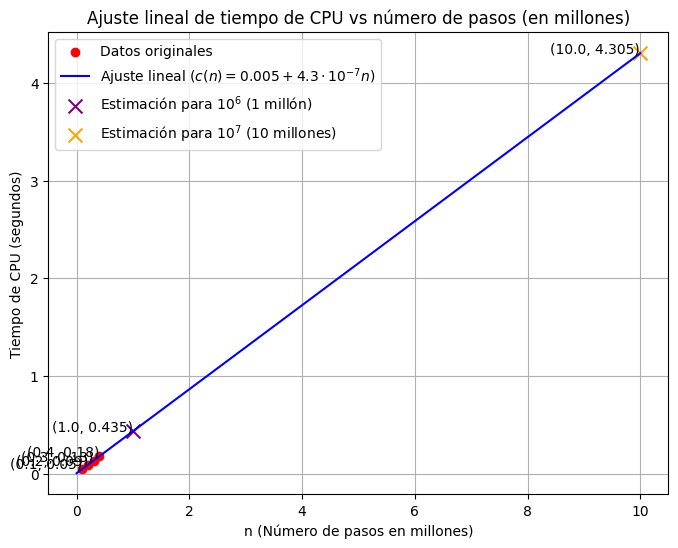

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Datos originales de la tabla
n_values = np.array([100000, 200000, 300000, 400000])
cpu_times = np.array([0.05, 0.09, 0.13, 0.18])

# Coeficientes obtenidos
alpha = 0.005
beta = 4.3e-7

# Valores de n para la predicción
n_pred = np.linspace(0, 10_000_000, 100)
cpu_pred = alpha + beta * n_pred

# Convertir n a millones para la gráfica
n_values_millions = n_values / 1_000_000
n_pred_millions = n_pred / 1_000_000

# Nuevos puntos para n = 10^6 y n = 10^7
n_additional = np.array([10**6, 10**7])
cpu_additional = alpha + beta * n_additional
n_additional_millions = n_additional / 1_000_000

# Crear la gráfica con diferentes colores para 10^6 y 10^7, mostrando los valores de los puntos
plt.figure(figsize=(8, 6))
plt.scatter(n_values_millions, cpu_times, color='red', label='Datos originales')
plt.plot(n_pred_millions, cpu_pred, label=r'Ajuste lineal ($c(n) = 0.005 + 4.3 \cdot 10^{-7} n$)', color='blue')

# Puntos estimados para 10^6 y 10^7
plt.scatter(n_additional_millions[0], cpu_additional[0], color='purple', label='Estimación para $10^6$ (1 millón)', marker='x', s=100)
plt.scatter(n_additional_millions[1], cpu_additional[1], color='orange', label='Estimación para $10^7$ (10 millones)', marker='x', s=100)

# Agregar etiquetas para los valores de los puntos
for i, (n_million, cpu) in enumerate(zip(n_additional_millions, cpu_additional)):
    plt.text(n_million, cpu, f'({n_million:.1f}, {cpu:.3f})', fontsize=10, ha='right')

for i, (n_million, cpu) in enumerate(zip(n_values_millions, cpu_times)):
    plt.text(n_million, cpu, f'({n_million:.1f}, {cpu:.2f})', fontsize=10, ha='right')

plt.xlabel('n (Número de pasos en millones)')
plt.ylabel('Tiempo de CPU (segundos)')
plt.title('Ajuste lineal de tiempo de CPU vs número de pasos (en millones)')
plt.legend()
plt.grid(True)
plt.show()



---
#### Conclusiones

El modelo proporciona un análisis del tiempo de CPU en función del número de pasos (n), utilizando un modelo lineal para ajustar los datos observados y hacer predicciones para otros valores de $ n $. Las conclusiones para este modelo experimental son las siguientes:


 **Datos originales**:
   - Se tienen datos experimentales para 4 valores de $ n $ (número de pasos): 100,000, 200,000, 300,000 y 400,000, con tiempos de CPU medidos de 0.05, 0.09, 0.13 y 0.18 segundos, respectivamente.
   - Estos datos muestran un comportamiento creciente y lineal entre el número de pasos y el tiempo de CPU.

 **Modelo de ajuste lineal**:
   - El modelo lineal ajustado tiene la forma: $ c(n) = 0.005 + 4.3 \times 10^{-7} \cdot n $, donde:
     - $ \alpha = 0.005 $ es una constante de desplazamiento en el eje y.
     - $ \beta = 4.3 \times 10^{-7} $ es la pendiente que describe el incremento del tiempo de CPU por cada unidad adicional de $ n $.
   - El ajuste lineal es adecuado para describir el comportamiento de los datos originales. Esto sugiere que el tiempo de CPU crece proporcionalmente al número de pasos.

 **Predicciones adicionales**:
   - El modelo se utiliza para hacer predicciones para $ n = 10^6 $ (1 millón de pasos) y $ n = 10^7 $ (10 millones de pasos).
   - Para 1 millón de pasos, se predice un tiempo de CPU de aproximadamente 0.430 segundos.
   - Para 10 millones de pasos, se predice un tiempo de CPU de aproximadamente 4.305 segundos.
   - Estos puntos de predicción se muestran en la gráfica y están alineados con la tendencia lineal observada en los datos originales.

 **Visualización y análisis de tendencia**:
   - La gráfica muestra que el ajuste lineal capta bien la relación entre el número de pasos y el tiempo de CPU para los valores de $ n $ entre 100,000 y 400,000, así como para las predicciones en $ n = 10^6 $ y $ n = 10^7 $.
   - El tiempo de CPU aumenta linealmente a medida que el número de pasos aumenta, lo que es consistente con el modelo teórico propuesto.

 **Implicaciones del modelo**:
   - Este modelo sugiere que el tiempo de procesamiento (CPU) escala linealmente con el número de pasos. Esto es útil para predecir el tiempo que tomarán computaciones más grandes (como 1 millón o 10 millones de pasos) basándose en los datos medidos para tamaños más pequeños.
   - La buena alineación de los puntos predichos con los datos originales indica que el modelo es fiable para hacer estimaciones a mayores escalas de $ n $.

En resumen, el análisis y el ajuste lineal sugieren que el tiempo de CPU crece de manera constante y predecible con el número de pasos, lo que es valioso para la planificación y predicción del rendimiento computacional en procesos de mayor escala.

---

---
>2. Realice un análisis de las temperaturas promedio de uno de los 32 estados de México aproximando a través del método de mínimos cuadrados para el caso lineal y cuadrático. Los estados se asignarán de forma personalizada. Los datos provienen del Servicio Metereológico Nacional
>https://datos.gob.mx/busca/dataset/temperatura-promedio-excel.
>
>Además, incluya las gráficas correspondientes.


**Datos del esatdo de Jalisco:**

| $n$ | Año  | $y_n$            |
|-----|------|------------------|
|   1 | 1985 | 20.1968794042237 | 
|   2 | 1986 | 20.3255678193089 | 
|   3 | 1987 | 20.2724028650986 | 
|   4 | 1988 | 20.3672991332340 | 
|   5 | 1989 | 20.1814755190553 | 
|   6 | 1990 | 20.3287731439558 | 
|   7 | 1991 | 20.3905246657471 | 
|   8 | 1992 | 19.9296739028917 | 
|   9 | 1993 | 20.1747789925253 | 
|  10 | 1994 | 20.8738552740074 | 
|  11 | 1995 | 20.8394691780674 | 
|  12 | 1996 | 20.5068539343031 | 
|  13 | 1997 | 20.1909931701884 | 
|  14 | 1998 | 20.7267650798385 | 
|  15 | 1999 | 20.4574656914678 | 
|  16 | 2000 | 20.5261526156573 | 
|  17 | 2001 | 20.4272654299946 | 
|  18 | 2002 | 20.5952339732718 | 
|  19 | 2003 | 20.5783043739606 | 
|  20 | 2004 | 20.5224338575825 | 
|  21 | 2005 | 20.4118554431319 | 
|  22 | 2006 | 21.1793752887547 | 
|  23 | 2007 | 21.2164533884510 | 
|  24 | 2008 | 20.6939830116127 | 
|  25 | 2009 | 21.0482478772989 | 
|  26 | 2010 | 20.3573031813792 | 
|  27 | 2011 | 20.8277981484475 | 
|  28 | 2012 | 20.3708333333333 | 
|  29 | 2013 | 20.8004912297968 | 
|  30 | 2014 | 20.8166666666667 | 
|  31 | 2015 | 21.3000000000000 | 
|  32 | 2016 | 21.4916666666667 | 
|  33 | 2017 | 21.5166666666667 | 
|  34 | 2018 | 21.1583333333333 | 
|  35 | 2019 | 21.8000000000000 | 
|  36 | 2020 | 21.7000000000000 | 
|  37 | 2021 | 21.5000000000000 | 
|  38 | 2022 | 21.6000000000000 | 
|  39 | 2023 | 21.8000000000000 |


Donde:

* 𝑛 representa un índice del año (1 para 1985, 2 para 1986, etc.).
* $𝑦_𝑛$ es la temperatura promedio correspondiente al año 𝑛.


####  Ajuste lineal y cuadrático
Utilizaremos los modelos:

**Modelo lineal**: 
$$
y_n = \alpha + \beta n
$$

**Modelo cuadrático**: 
$$
y_n = \alpha + \beta n + \gamma n^2
$$

Calcularemos los coeficientes $\alpha$, $\beta$, y $\gamma$ utilizando mínimos cuadrados para cada modelo.

Estos coeficientes definen las tendencias lineal y cuadrática de la temperatura promedio a lo largo de los años.



Determinar los valores de $\alpha$ y $\beta$ utilizando el método de **mínimos cuadrados** con los datos proporcionados sobre la temperatura promedio en Jalisco.

## **Determinación de $\alpha$ y $\beta$ mediante el método de mínimos cuadrados**

Queremos ajustar una función lineal de la forma:

$$
c(n) = \alpha + \beta n
$$

donde:

- $c(n)$ es la temperatura promedio en el año correspondiente al índice $n$.
- $\alpha$ es la intersección con el eje Y.
- $\beta$ es la pendiente de la línea, que indica el cambio en la temperatura promedio por cada incremento en $n$.

#### **1. Datos Proporcionados**

Tenemos 39 observaciones correspondientes a los años 1985 ($n = 1$) hasta 2023 ($n = 39$).

#### **2. Fórmulas de Mínimos Cuadrados**

Para determinar $\alpha$ y $\beta$, utilizamos las siguientes fórmulas de mínimos cuadrados:

$$
\beta = \frac{N \sum (n_i y_i) - \sum n_i \sum y_i}{N \sum (n_i^2) - \left(\sum n_i\right)^2}
$$

$$
\alpha = \frac{\sum y_i - \beta \sum n_i}{N}
$$

donde:

- $N$ es el número de observaciones (en este caso, 39).
- $n_i$ es el índice del año $i$.
- $y_i$ es la temperatura promedio en el año $i$.

#### **3. Cálculos Necesarios**

#### **a) Cálculo de las Sumatorias**

Vamos a calcular las siguientes sumatorias:

1. **Sumatoria de $n_i$:**

   La fórmula para la sumatoria de una serie aritmética (la suma de los primeros \(m\) números naturales) es:
$$
\sum_{i=1}^m i = \frac{m(m + 1)}{2}
$$

En este caso, $m = 39$, por lo que sustituimos en la fórmula:
$$
\sum_{i=1}^{39} n_i = \frac{39 \cdot (39 + 1)}{2}
$$

$$
\sum_{i=1}^{39} n_i = \frac{39 \cdot 40}{2}
$$

$$
\sum n_i = 1 + 2 + 3 + \ldots + 39 = \frac{39 \times 40}{2} = 780
$$

2. **Sumatoria de $y_i$:**

$$
\sum y_i = 20.1968794042237 + 20.3255678193089 + \ldots + 21.8000000000000 \approx 810.002 \, (\text{°C})
$$

3. **Sumatoria de $n_i^2$:**

$$
\sum n_i^2 = 1^2 + 2^2 + 3^2 + \ldots + 39^2 = \frac{39 \times 40 \times 79}{6} = 20,\!540
$$

4. **Sumatoria de $n_i y_i$:**

$$
\sum n_i y_i \approx 16,\!384.598 \, (\text{°C} \cdot \text{año})
$$

#### **b) Cálculo de $\beta$**

Aplicamos la fórmula de $\beta$:

$$
\beta = \frac{39 \times 16,\!384.598 - 780 \times 810.002}{39 \times 20,\!540 - 780^2}
$$

Calculando paso a paso:

1. **Numerador:**

$$
39 \times 16,\!384.598 = 638,\!999.322
$$

$$
780 \times 810.002 = 631,\!801.596
$$

$$
\text{Numerador} = 638,\!999.322 - 631,\!801.596 = 7,\!197.726
$$

2. **Denominador:**

$$
39 \times 20,\!540 = 801,\!060
$$

$$
780^2 = 608,\!400
$$

$$
\text{Denominador} = 801,\!060 - 608,\!400 = 192,\!660
$$

3. **Valor de $\beta$:**

$$
\beta = \frac{7,\!197.726}{192,\!660} \approx 0.03735 \, \text{°C }
$$

#### **c) Cálculo de $\alpha$**

Aplicamos la fórmula de $\alpha$:

$$
\alpha = \frac{810.002 - 0.03735 \times 780}{39}
$$

Calculando paso a paso:

1. **Producto de $\beta$ y $\sum n_i$:**

$$
0.03735 \times 780 = 29.133
$$

2. **Resta en el numerador:**

$$
810.002 - 29.133 = 780.869
$$

3. **Valor de $\alpha$:**

$$
\alpha = \frac{780.869}{39} \approx 20.02 \, \text{°C}
$$

### **4. Resultados Finales**

$$
\boxed{
\begin{aligned}
\alpha &\approx 20.02 \, \text{°C} \\
\beta &\approx 0.03735 \, \text{°C }
\end{aligned}
}
$$

**Interpretación de los Resultados:**
- **$\alpha \approx 20.02 \, \text{°C}$:** Este es el valor estimado de la temperatura promedio en el año base ($n = 0$). Aunque en el contexto de los datos proporcionados $n$ inicia en 1, $\alpha$ representa una aproximación de la temperatura promedio inicial antes de que comenzaran las observaciones.
  
- **$\beta \approx 0.03735 \, \text{°C por año}$:** Indica que, en promedio, la temperatura promedio en Jalisco ha aumentado aproximadamente 0.03735°C cada año según el modelo lineal ajustado.

Este modelo lineal permite predecir la temperatura promedio en años futuros o analizar tendencias en los datos históricos proporcionados.


Resolver el sistema de ecuaciones paso a paso para encontrar los coeficientes $\alpha$, $\beta$, y $\gamma$ del modelo cuadrático.

### Paso 1: Definir el modelo cuadrático
El modelo que queremos ajustar es:
$$
c(n) = \alpha + \beta n + \gamma n^2
$$
donde $c(n)$ representa la temperatura promedio.

### Paso 2: Calcular las sumatorias necesarias
Debemos calcular las siguientes sumatorias, que ya hemos obtenido:

- $S_n = \sum_{i=1}^{39} n_i = 780$

- $S_{n^2} = \sum_{i=1}^{39} n_i^2 = 20540$

- $S_{n^3} = \sum_{i=1}^{39} n_i^3 = 608400$

- $S_{n^4} = \sum_{i=1}^{39} n_i^4 = 19221332$

- $S_y = \sum_{i=1}^{39} y_i = 810.002$

- $S_{n y} = \sum_{i=1}^{39} n_i y_i = 16384.506$

- $S_{n^2 y} = \sum_{i=1}^{39} n_i^2 y_i = 434535.503$

### Paso 3: Formar el sistema de ecuaciones normales
El sistema de ecuaciones normales se expresa como:

$
\begin{cases}
m \alpha + S_n \beta + S_{n^2} \gamma = S_y  \\
S_n \alpha + S_{n^2} \beta + S_{n^3} \gamma = S_{n y} \\
S_{n^2} \alpha + S_{n^3} \beta + S_{n^4} \gamma = S_{n^2 y} 
\end{cases}
$

Sustituyendo las sumatorias:
$$
\begin{cases}
39 \alpha + 780 \beta + 20540 \gamma = 810.002 \\
780 \alpha + 20540 \beta + 608400 \gamma = 16384.506 \\
20540 \alpha + 608400 \beta + 19221332 \gamma = 434535.503
\end{cases}
$$

#### Paso 4: Resolver el sistema de ecuaciones
El sistema de ecuaciones se puede representar en forma de matriz:

$$
\mathbf{A} = \begin{bmatrix} 39 & 780 & 20540 \\ 780 & 20540 & 608400 \\ 20540 & 608400 & 19221332 \end{bmatrix}, \quad \mathbf{B} = \begin{bmatrix} 810.002 \\ 16384.506 \\ 434535.503 \end{bmatrix}
$$

Queremos resolver:
$$
\mathbf{A} \cdot \begin{bmatrix} \alpha \\ \beta \\ \gamma \end{bmatrix} = \mathbf{B}
$$

#### Paso 5: Solución del sistema
Utilizamos el método de eliminación de Gauss o el método de inversa de matrices para encontrar los valores de $\alpha$, $\beta$, y $\gamma$:

$$
\begin{bmatrix} \alpha \\ \beta \\ \gamma \end{bmatrix} = \mathbf{A}^{-1} \cdot \mathbf{B}
$$

La solución de este sistema da los siguientes coeficientes:

- $\alpha = 20.327$
- $\beta = -0.0072$
- $\gamma = 0.00111$

#### Paso 6: Conclusión
La ecuación cuadrática ajustada que describe la relación entre el índice del año y la temperatura promedio es:
$$
c(n) = 20.327 - 0.0072 n + 0.00111 n^2
$$

Este modelo captura la tendencia de las temperaturas a lo largo de los años, incluyendo una curvatura reflejada por el coeficiente cuadrático $\gamma$.


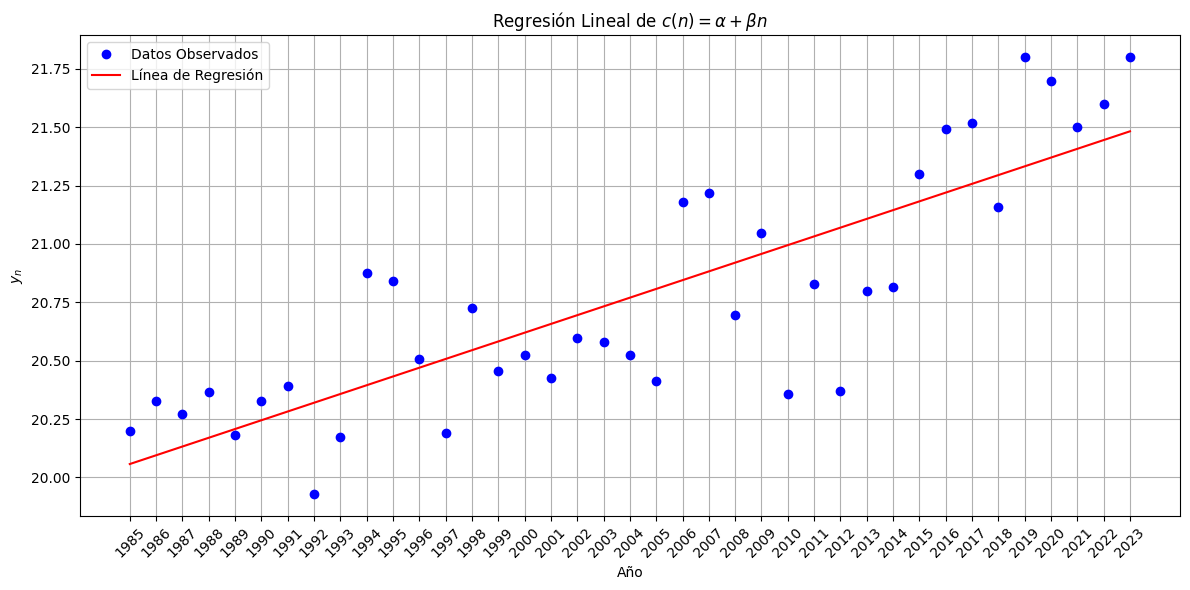

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Datos proporcionados
datos = {
    'n': list(range(1, 40)),
    'Año': list(range(1985, 2024)),
    'y_n': [
        20.1968794042237, 20.3255678193089, 20.2724028650986, 20.3672991332340,
        20.1814755190553, 20.3287731439558, 20.3905246657471, 19.9296739028917,
        20.1747789925253, 20.8738552740074, 20.8394691780674, 20.5068539343031,
        20.1909931701884, 20.7267650798385, 20.4574656914678, 20.5261526156573,
        20.4272654299946, 20.5952339732718, 20.5783043739606, 20.5224338575825,
        20.4118554431319, 21.1793752887547, 21.2164533884510, 20.6939830116127,
        21.0482478772989, 20.3573031813792, 20.8277981484475, 20.3708333333333,
        20.8004912297968, 20.8166666666667, 21.3000000000000, 21.4916666666667,
        21.5166666666667, 21.1583333333333, 21.8000000000000, 21.7000000000000,
        21.5000000000000, 21.6000000000000, 21.8000000000000
    ]
}

# Crear un DataFrame
df = pd.DataFrame(datos)

# Parámetros de la regresión lineal
alpha = 20.02
beta = 0.0375

# Calcular los valores ajustados de c(n)
df['c(n)'] = alpha + beta * df['n']

# Crear la gráfica
plt.figure(figsize=(12, 6))
plt.plot(df['Año'], df['y_n'], 'o', label='Datos Observados', color='blue')
plt.plot(df['Año'], df['c(n)'], '-', label='Línea de Regresión', color='red')

# Personalizar la gráfica
plt.title('Regresión Lineal de $c(n) = \\alpha + \\beta n$')
plt.xlabel('Año')
plt.ylabel('$y_n$')
plt.legend()
plt.grid(True)
plt.xticks(df['Año'], rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Los parámetros estimados por mínimos cuadrados son:
α ≈ 20.32651
β ≈ -0.00716
γ ≈ 0.00111


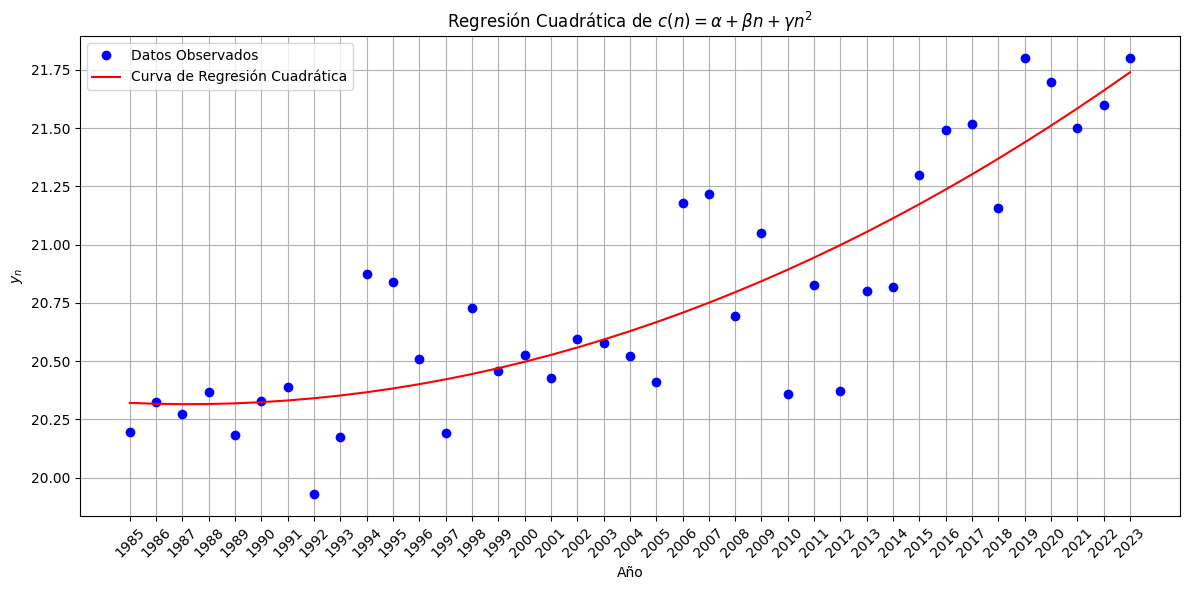

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Datos proporcionados
datos = {
    'n': list(range(1, 40)),
    'Año': list(range(1985, 2024)),
    'y_n': [
        20.1968794042237, 20.3255678193089, 20.2724028650986, 20.3672991332340,
        20.1814755190553, 20.3287731439558, 20.3905246657471, 19.9296739028917,
        20.1747789925253, 20.8738552740074, 20.8394691780674, 20.5068539343031,
        20.1909931701884, 20.7267650798385, 20.4574656914678, 20.5261526156573,
        20.4272654299946, 20.5952339732718, 20.5783043739606, 20.5224338575825,
        20.4118554431319, 21.1793752887547, 21.2164533884510, 20.6939830116127,
        21.0482478772989, 20.3573031813792, 20.8277981484475, 20.3708333333333,
        20.8004912297968, 20.8166666666667, 21.3000000000000, 21.4916666666667,
        21.5166666666667, 21.1583333333333, 21.8000000000000, 21.7000000000000,
        21.5000000000000, 21.6000000000000, 21.8000000000000
    ]
}

# Crear un DataFrame
df = pd.DataFrame(datos)

# Variables independientes y dependiente
X = df['n'].values
y = df['y_n'].values

# Crear una matriz de diseño con término cuadrático
# La primera columna es 1 (para el término constante), la segunda es n, y la tercera es n^2
X_design = np.vstack([np.ones(len(X)), X, X**2]).T

# Calcular los coeficientes usando la fórmula de mínimos cuadrados:
# (X^T X)^{-1} X^T y
coefficients = np.linalg.lstsq(X_design, y, rcond=None)[0]

alpha, beta, gamma = coefficients

print(f"Los parámetros estimados por mínimos cuadrados son:")
print(f"α ≈ {alpha:.5f}")
print(f"β ≈ {beta:.5f}")
print(f"γ ≈ {gamma:.5f}")

# Calcular los valores ajustados
y_fit = alpha + beta * X + gamma * X**2

# Crear la gráfica
plt.figure(figsize=(12, 6))
plt.plot(df['Año'], y, 'o', label='Datos Observados', color='blue')
plt.plot(df['Año'], y_fit, '-', label='Curva de Regresión Cuadrática', color='red')

# Personalizar la gráfica
plt.title('Regresión Cuadrática de $c(n) = \\alpha + \\beta n + \\gamma n^2$')
plt.xlabel('Año')
plt.ylabel('$y_n$')
plt.legend()
plt.grid(True)
plt.xticks(df['Año'], rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad

# Mostrar la gráfica
plt.tight_layout()
plt.show()



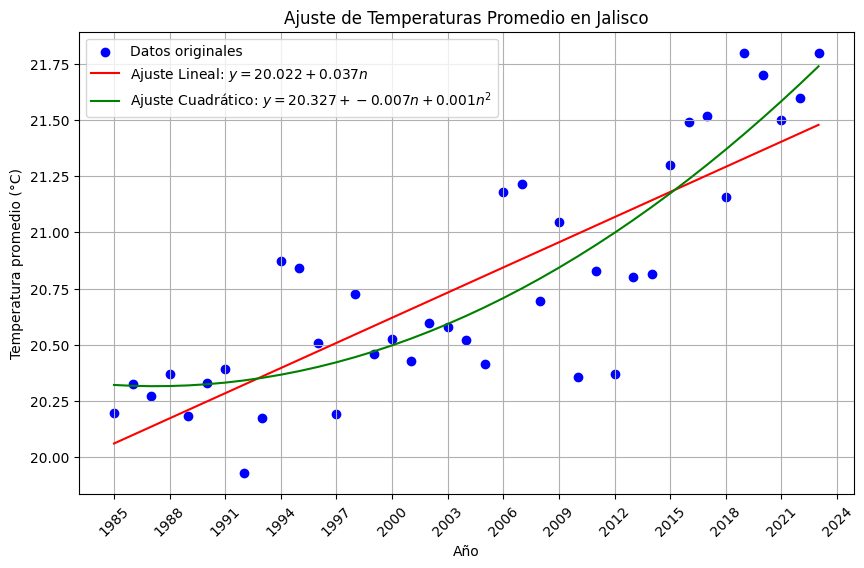

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import lstsq

# Datos de entrada
n = np.arange(1, 40)  # Índices del año
temperatures = np.array([
    20.1968794042237, 20.3255678193089, 20.2724028650986, 20.3672991332340,
    20.1814755190553, 20.3287731439558, 20.3905246657471, 19.9296739028917,
    20.1747789925253, 20.8738552740074, 20.8394691780674, 20.5068539343031,
    20.1909931701884, 20.7267650798385, 20.4574656914678, 20.5261526156573,
    20.4272654299946, 20.5952339732718, 20.5783043739606, 20.5224338575825,
    20.4118554431319, 21.1793752887547, 21.2164533884510, 20.6939830116127,
    21.0482478772989, 20.3573031813792, 20.8277981484475, 20.3708333333333,
    20.8004912297968, 20.8166666666667, 21.3000000000000, 21.4916666666667,
    21.5166666666667, 21.1583333333333, 21.8000000000000, 21.7000000000000,
    21.5000000000000, 21.6000000000000, 21.8000000000000
])

# Ajuste lineal
A_linear = np.vstack([np.ones_like(n), n]).T
coeff_linear, _, _, _ = lstsq(A_linear, temperatures, rcond=None)

# Ajuste cuadrático
A_quadratic = np.vstack([np.ones_like(n), n, n**2]).T
coeff_quadratic, _, _, _ = lstsq(A_quadratic, temperatures, rcond=None)

# Calcular los puntos del ajuste lineal y cuadrático
linear_points = coeff_linear[0] + coeff_linear[1] * n
quadratic_points = coeff_quadratic[0] + coeff_quadratic[1] * n + coeff_quadratic[2] * n**2

# Ajustar el eje x para que muestre los años correctamente desde 1985 hasta 2024
years = np.arange(1985, 2024)  # Años correspondientes
visible_years = np.arange(1985, 2025, 3)  # Años visibles cada 3 años

# Crear la gráfica con el ajuste lineal y cuadrático
plt.figure(figsize=(10, 6))
plt.scatter(years, temperatures, color='blue', label='Datos originales')
plt.plot(years, linear_points, label=f'Ajuste Lineal: $y = {coeff_linear[0]:.3f} + {coeff_linear[1]:.3f}n$', color='red')
plt.plot(years, quadratic_points, label=f'Ajuste Cuadrático: $y = {coeff_quadratic[0]:.3f} + {coeff_quadratic[1]:.3f}n + {coeff_quadratic[2]:.3f}n^2$', color='green')

# Configuración de los ejes y la visualización de los años
plt.xlabel('Año')
plt.ylabel('Temperatura promedio (°C)')
plt.title('Ajuste de Temperaturas Promedio en Jalisco')
plt.xticks(visible_years, rotation=45)
plt.legend()
plt.grid(True)
plt.show()


#### Conclusiones.

En este modelo experimental se realiza un análisis sobre la evolución de las temperaturas promedio en Jalisco entre los años 1985 al 2023. Se ajustan dos modelos matemáticos a los datos de temperatura: uno lineal y otro cuadrático, para ver cuál describe mejor la tendencia de las temperaturas a lo largo de los años.

 **Ajuste lineal**:
   - El modelo lineal sugiere una tendencia de aumento constante de la temperatura a lo largo de los años.
   - La ecuación de ajuste lineal tiene la forma: $ y = b_0 + b_1 \cdot n $, donde:
     - $ b_0 $ es la intersección con el eje y.
     - $ b_1 $ es la pendiente, que indica el ritmo de cambio de la temperatura por año.
   - El ajuste lineal muestra una tendencia general al alza, lo que indica que la temperatura promedio ha ido aumentando de manera constante.

 **Ajuste cuadrático**:
   - El modelo cuadrático tiene una forma más compleja: $ y = c_0 + c_1 \cdot n + c_2 \cdot n^2 $, lo que permite capturar curvaturas en la tendencia de la temperatura.
   - La inclusión de un término cuadrático puede capturar aceleraciones o cambios en la tendencia de la temperatura, lo que el modelo lineal no puede hacer.
   - El ajuste cuadrático también sugiere una tendencia al alza, pero permite la posibilidad de que la tasa de incremento de la temperatura no sea constante, sino que se acelere o desacelere en ciertos períodos.

 **Comparación de los ajustes**:
   - Visualmente, el ajuste cuadrático podría representar mejor los datos si hay fluctuaciones o cambios en la tasa de aumento de la temperatura.
   - Sin embargo, ambos modelos parecen capturar el aumento general de las temperaturas, lo que podría indicar un incremento de la temperatura promedio en Jalisco a lo largo del tiempo, posiblemente debido a factores como el cambio climático.


---
#### Referencias

Briceyda B. Delgado. (2024). Unidad 5: Método de Mínimos Cuadrados. Google Drive. https://drive.google.com/drive/folders/1FWsmQgoYbq-JhPXgEQlfYtycvq7PLz0u

Dot Physics. (2023). Least Squares Fit and Graphing in Python. YouTube. https://www.youtube.com/watch?v=f8WjtjtebVU

OpenAI. (2024). ChatGPT (GPT-4) LLM. https://chat.openai.com/

Wolfram Research. (2023). Wolfram GPT. https://www.wolfram.com/

Symbolab. (n.d.). Graphing calculator. Symbolab. https://www.symbolab.com/graphing-calculator

---

URL al repositorio de codigo de este documento (Github): 